# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

In [1]:
import numpy as np
import pandas as pd
import requests
import requests_cache

requests_cache.install_cache("mycache")

In [2]:
import lxml.html as lx

In [3]:
import time

In [4]:
import nltk
import nltk.corpus

In [5]:
%matplotlib inline

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

In [6]:
def get_links(url):
    """This function has a parameter url for the URL of the article list, and return a list of article URLs
    """
    
    # Download the page
    response = requests.get(url)
    response.raise_for_status()

    # Parse the HTML
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    
    #Get url from each parts of the html
    links1 = html.xpath("//h2[contains(@class, 'headline')]//a/@href")
    links2 = html.xpath("//h4[not(contains(@class, 'kicker-link'))]//a/@href")
    links3 = html.xpath("//h3[contains(@class, 'headline display-above')]//a/@href")
    
    #Tansfer links to str.
    links1 = [str(l) for l in links1]
    links2 = [str(l) for l in links2]
    links3 = [str(l) for l in links3]
    
    #Combine all the urls and make them unique.
    links = links1 + links2 + links3
    return list(set(links))

    
    

In [7]:
#Test on loacl
local = get_links("https://www.sfchronicle.com/local/")
local[0:10]

['https://www.sfchronicle.com/bayarea/article/She-had-vision-and-drive-but-job-loss-could-have-13500895.php',
 'https://www.sfchronicle.com/bayarea/article/Single-mom-s-dream-tripped-up-by-volcano-Marin-13443142.php',
 'https://www.sfchronicle.com/bayarea/article/Season-of-Sharing-She-inherited-a-house-then-13436015.php',
 'https://www.sfchronicle.com/bayarea/heatherknight/article/Supervisor-Norman-Yee-advises-getting-a-lawyer-13625687.php',
 'https://www.sfchronicle.com/bayarea/article/Season-of-Sharing-Mom-s-and-daughter-s-lives-13413262.php',
 'https://www.sfchronicle.com/politics/article/Bay-Area-political-events-Legislators-town-13637118.php',
 'https://projects.sfchronicle.com/2018/stem-cells/politics/',
 'https://projects.sfchronicle.com/2018/stem-cells/clinics/',
 'https://www.sfchronicle.com/california-wildfires/article/As-terror-of-wildfire-fades-survivors-face-new-13279744.php',
 'https://www.sfchronicle.com/bayarea/heatherknight/article/Mayor-s-call-for-housing-seeks-to-spe

In [8]:
#Test on sports
sports = get_links("https://www.sfchronicle.com/sports/")
sports[0:10]

['https://www.sfchronicle.com/sports/article/We-know-football-is-deadly-What-are-we-going-to-13319238.php',
 'https://www.sfchronicle.com/raiders/article/Raiders-hire-A-J-Neibel-to-lead-strength-and-13605901.php',
 'https://www.sfchronicle.com/giants/article/Giants-to-roll-out-Mac-Attack-in-Cactus-League-13637774.php',
 'https://www.sfchronicle.com/raiders/article/Raiders-playing-in-Oracle-Park-remains-a-13595411.php',
 'https://www.sfchronicle.com/collegesports/article/Dominican-s-prolific-Natalie-Diaz-powered-by-13620996.php',
 'https://www.sfchronicle.com/athletics/article/Starter-Parker-Dunshee-rapidly-rising-through-13638225.php',
 'https://www.sfchronicle.com/athletics/article/Parker-Bridwell-is-in-better-spot-with-A-s-than-13634911.php',
 'https://www.sfchronicle.com/collegesports/article/Arizona-State-s-Rob-Edwards-proves-too-much-for-13632683.php',
 'https://www.sfchronicle.com/collegesports/article/Stanford-men-seek-tie-breaking-sweep-of-Arizona-13628471.php',
 'https://www.s

In [9]:
#Test on food
food = get_links("https://www.sfchronicle.com/food/")
food[0:10]

['https://www.sfchronicle.com/food/article/The-gayest-cook-in-the-Castro-12281983.php',
 'https://www.sfchronicle.com/restaurants/article/When-it-came-to-restaurants-Ed-Lee-was-a-regular-12425600.php',
 'https://www.sfchronicle.com/food/article/2017-wasn-t-the-greatest-year-for-San-Francisco-12480441.php',
 'https://www.sfchronicle.com/restaurants/article/All-Consuming-Outer-Sunset-diners-and-deep-dives-11267862.php',
 'https://www.sfchronicle.com/recipes/article/6-health-claims-based-on-industry-funded-food-13631572.php',
 'https://www.sfchronicle.com/wine/article/Months-after-Wine-Country-fires-damaged-12474309.php',
 'https://www.sfchronicle.com/wine/article/Verjus-answers-the-call-of-San-Francisco-s-13535408.php',
 'https://www.sfchronicle.com/food/article/Welcome-to-Refuge-Stories-about-finding-humanity-12281940.php',
 'https://www.sfchronicle.com/wine/spirits/article/How-the-Bay-Area-s-craft-cocktail-culture-was-12398896.php',
 'https://www.sfchronicle.com/wine/article/Kosta-Brow

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [10]:
def get_information(url):
    """This function has a parameter url for the URL of the article. And returns a dictionary with keys for url,
    title,text,author,date and date_updated.
    """
    # Download the page and Parse the HTML
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)

    #Get the title
    try:
        title = html.xpath("//h1[contains(@class, 'header-title')]|//h1[contains(@class, 'headline entry-title')]")
        title = title[0].text_content()
    except:
        title = np.NaN
    
    #Get the text
    try:
        text_list = [x.text_content() for x in html.xpath("//section[contains(@class, 'body')]/p|//div[contains(@class,'article-body')]/p")]
        text = "\n".join(text_list)
    except:
        text = np.NaN
    
    #Get the author,and remove 'By' and extra white space if necessary
    try:
        author = html.xpath("//p[contains(@class,'byline')]/a|//span[contains(@class, 'header-authors-name')]|//span[contains(@class,'header-byline')]")
        author = author[0].text_content().strip('\n ').strip('By ')
    except:
        author = np.NaN

    
    #Get the date
    try:
        date = html.xpath("//time[contains(@itemprop, 'datePublished')]/@datetime|//meta[contains(@itemprop,'datePublished')]/@content")[0]
    except:
        date = np.NaN
        
    #Get the update date
    try:
        date_updated = html.xpath("//time[contains(@itemprop, 'dateModified')]/@datetime|//meta[contains(@name,'article:modified_time')]/@content")[0]
    except:
        date_updated = np.NaN
        
        
    time.sleep(0.1)
    return {"url":url,"title":title,"text":text,"author":author,"date":date,"date_updated":date_updated}
    

In [11]:
#Test on the article
get_information('https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php')

{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book “Gardenlust: A Botanical Tour of the World’s Best New Gardens” by Christopher Woods (Timber Press, 416 pages, $40) shows you gardens from around the globe, including some surprising places such as Oman, Singapore and the island of Nevis in the West Indies, all of them created in the past 20 years. Fifty gardens or designers are featured. The sites are all engaging; some are breathtaking.\nWoods, the author and major photographer of the book, began his career as a gardener at Kew Gardens in London. He then worked at a number of public gardens in England and the U.S., including 20 years as director and chief designer of Chanticleer Arboretum in Pennsylvania. (I have been to Chanticleer and have seen the Ruins Garden he created there from the stone and slate ruins of the home of the orig

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [993]:
#Get data frames of articles for the "Biz+Tech" ,"Sports" and "Politics" category

In [12]:
BizTech_link = get_links('https://www.sfchronicle.com/business/')
BizTech = [get_information(u) for u in BizTech_link]
BizTech = pd.DataFrame(BizTech)
BizTech['category'] = 'Biz+Tech'

In [14]:
Sport_link = get_links('https://www.sfchronicle.com/sports/')
Sport = [get_information(u) for u in Sport_link]
Sport = pd.DataFrame(Sport)
Sport['category'] = 'Sports'

In [15]:
Politics_link = get_links('https://www.sfchronicle.com/elections/')
Politics = [get_information(u) for u in Politics_link]
Politics = pd.DataFrame(Politics)
Politics['category'] = 'Politics'

In [26]:
#Combine the dataframe and clean the data
#Remove title with NaN since they are not articles
df = pd.concat([Politics,Sport,BizTech])
df = df[df['title'] == df['title']]

In [27]:
#Convert columns to appropriate dtypes
df['date'] = pd.to_datetime(df['date'])
df['date_updated'] = pd.to_datetime(df['date_updated'])
df['title'] = [str(l) for l in df['title']]

In [28]:
#Adjust the two or more author situations
#Some elements with multiple authors has '\n' and extra white space,so we remove extra things and make them clean
def adjust_author(author):
    author = ' '.join([w.strip() for w in author.split("\n")])
    return author

In [29]:
#Ajust the author column by applying function, and set missing value to NaN
new = df.loc[df['author'].str.find('\n') != -1.0,'author'].apply(adjust_author)
df.loc[df['author'].str.find('\n') != -1.0,'author'] = new
df.loc[df['author'] == '','author'] = np.NaN

In [37]:
#give index
df.index = range(len(df['author']))
df[0:20]

,author,date,date_updated,text,title,url,category
0,Trisha Thadani,2018-11-12 03:35:18,2018-11-12 03:36:36,The San Francisco Board of Supervisors tilted ...,SF Board of Supervisors’ new mash-up of member...,https://www.sfchronicle.com/politics/article/S...,Politics
1,Tal Kopan,2019-02-05 18:37:42,2019-02-05 18:38:46,WASHINGTON — Maria Mendoza-Sanchez fought for ...,Deported Oakland nurse to be Barbara Lee guest...,https://www.sfchronicle.com/politics/article/D...,Politics
2,"STEVE PEOPLES, AP National Political Writer",2019-02-22 23:00:17,2019-02-22 23:09:00,WASHINGTON (AP) — President Donald Trump has r...,Puerto Rico Gov: Trump refuses meeting over hu...,https://www.sfchronicle.com/news/article/Puert...,Politics
3,Joe Garofoli,2019-02-02 06:38:19,2019-02-02 06:39:34,Howard Schultz wanted to make sure that his Sa...,Howard Schultz tells San Francisco audience he...,https://www.sfchronicle.com/politics/article/H...,Politics
4,John Wildermuth,2019-01-04 12:00:00,2019-01-06 02:15:50,SACRAMENTO — When Jerry Brown’s fourth term in...,What Jerry Brown has learned,https://www.sfchronicle.com/politics/article/W...,Politics
5,John Wildermuth,2018-12-21 04:47:10,2018-12-21 04:48:29,Gov.-elect Gavin Newsom will separate himself ...,Gavin Newsom putting businesses in blind trust...,https://www.sfchronicle.com/politics/article/G...,Politics
6,Willie Brown,2019-02-02 12:00:00,2019-02-02 12:00:31,Sen. Kamala Harris’ Rolls-Royce rollout of her...,Kamala Harris learns the perils of presidentia...,https://www.sfchronicle.com/bayarea/willieswor...,Politics
7,Alexei Koseff,2019-02-13 01:04:59,2019-02-13 01:06:07,SACRAMENTO — Plans for a high-speed train betw...,Newsom says California high-speed rail must fo...,https://www.sfchronicle.com/politics/article/N...,Politics
8,Dominic Fracassa,2019-01-31 00:32:27,2019-01-31 00:33:41,San Francisco Mayor London Breed opened her fi...,"In State of City speech, Mayor London Breed sa...",https://www.sfchronicle.com/bayarea/article/Wa...,Politics
9,Alexei Koseff,2019-01-25 03:03:38,2019-01-25 03:04:58,SACRAMENTO — A fourth-term assemblyman who clu...,California legislator flips from Republican to...,https://www.sfchronicle.com/politics/article/C...,Politics


__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

In [32]:
def get_frequency(text):
    """This function take the text need to be tokenized as an input and return a list of frequency of words.
    """
    #Tokenize the lower case
    words = nltk.word_tokenize(text.lower())
    
    #Do not need stopwords and some words that we could not see the topic form them
    #for example san francisco is meaningless since we get article from sfchronicle
    stopwords = nltk.corpus.stopwords.words("english")+['said','get','like','would','one','two','san','francisco',
                                                        'california','state','also','could','think','percent','new',
                                                       'year','city','first','people','years','last','going','million',
                                                        'time']
    words = [w for w in words if w not in stopwords]
    
    #Get frequency
    fq = nltk.FreqDist(w for w in words if w.isalnum())
    return fq

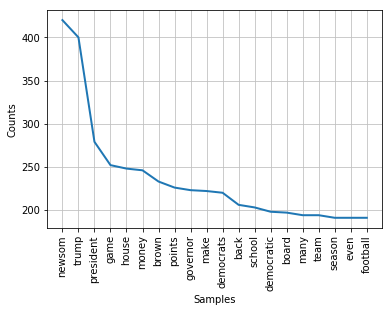

In [33]:
#Get all the text in datafame together and see their fquency
all_text = ' '.join(df['text'])
fq_all = get_frequency(all_text)
fq_all.plot(20)

From the plot, we can see that 'newsom','trump' and 'president' appear mostly. So, recently the Chronicle covered topics about Newsom and Trump. This may because that Newsom is current governor of California and Trump is the president of U.S., so they have a huge influence on politics. The reason why Newsom appears more than Trump may be that Chronicle is related to SF. In addition, the Chronicle may also cover topics on making money since 'money' appeard many times. Furthermore, it has many topics on sports game since 'game','ponits' and 'team' appaer many times. What's more, it may have topics on house rental or price since the times 'house' appears many times. Also, the Chronicle may also mentions topics on house democrats many times since 'house' and 'democrats' appear a lot.

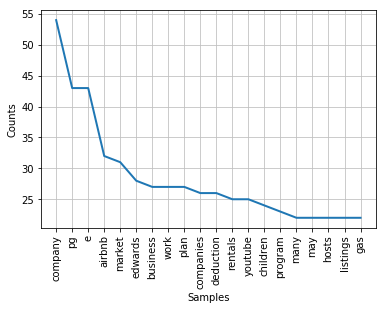

In [34]:
#Get Biz+Tech text in datafame together and see their fquency
text = ' '.join(df[df['category'] == 'Biz+Tech']['text'])
fq = get_frequency(text)
fq.plot(20)

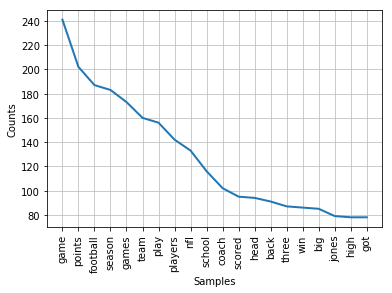

In [35]:
#Get sports text in datafame together and see their fquency
text = ' '.join(df[df['category'] == 'Sports']['text'])
fq = get_frequency(text)
fq.plot(20)

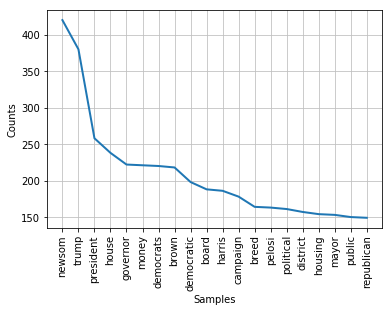

In [36]:
#Get politics text in datafame together and see their fquency
text = ' '.join(df[df['category'] == 'Politics']['text'])
fq = get_frequency(text)
fq.plot(20)

From the upper three plots, we can see that the categories influence the topcis a lot. The topics always closely related to category. More precisely, in the first plot, which is a 'Biz+Tech' category, 'company','airbnb','pg' and 'e' appear mostly. We can know that it talks about company, pge and some other things related to business; it also covers topics on someone called 'Edward'. He may be closely related to business or technologhy since we are in Biz+Tech Category. In addition, it may mention a lot of topics on work plan since the times 'work' and 'plan' appear are similar. Also, we can see topics on youtube is really popular.

As for the 'Sports' category in second plot, 'game','points','football' appear mostly. It is easy to see that it mentions a lot of things related to sports game: game, season, player and team. And we can see that football is really popular since 'football' and 'nfl' appear a lot of times. This category also covers topics on school sports since 'school' appears many time.

Finally, for 'Politics' category in last plot, 'newsom','trump' and 'president' appaer mostly. There are plenty of topics on Newsom and Trump since they are both powerful Politicians. Also, this category covers a lot of topics on house democrats and money. There are more topics on democratic than on republication since we get article from sfchronicle. And since 'Politics' category has much more articles than other categories:'Sports' and 'Biz+Tech', the most polpular words in this catagory becomes the most popular words among all three categories; we can see this in frequncy distribution plot of all articles.